##### Recruitment_Data

    1. IMPORTING LIBRARIES     
    2. LOADING DATA   
    3. EXPLORATORY DATA ANALYSIS   
    4. CONCLUSION

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the dataset

In [2]:
df = pd.read_csv('Recruitment_Data_updated.csv')
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus
...,...,...,...,...
107349,0.002813,3.003288,1.041518,NaN
107350,0.998179,2.997723,1.349780,NaN
107351,-0.016202,2.992603,0.791637,NaN
107352,-0.023847,2.005391,0.749299,NaN


In [3]:
# check the data avaiable in the dataset
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


# Exploratory Data Analysis

In [121]:
# Display shape of the Data
df.shape

(17872, 4)

In [122]:
# Statistical summary of the numeric columns
df.describe()

,attrition,performance_rating,sales_quota_pct
count,17872.000000,17872.000000,17872.000000
mean,0.214699,2.898852,1.085539
std,0.410627,0.684832,0.714070
min,-0.035566,0.974714,-0.730963
25%,-0.004637,2.022871,0.602888
50%,0.003581,2.998035,1.068484
75%,0.016884,3.010267,1.532799
max,1.038685,5.021773,3.680176


In [123]:
# Summary of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17872 entries, 0 to 17871
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           17872 non-null  float64
 1   performance_rating  17872 non-null  float64
 2   sales_quota_pct     17872 non-null  float64
 3   recruiting_source   9613 non-null   object 
dtypes: float64(3), object(1)
memory usage: 558.6+ KB


In [124]:
# Check Duplicates
df.duplicated().sum()

0

# Missing values

In [125]:
# Checlin the Missing values
df.isnull().sum()

attrition                0
performance_rating       0
sales_quota_pct          0
recruiting_source     8259
dtype: int64

In [126]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the result
print(missing_percentage)

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     46.211952
dtype: float64


In [127]:
# Calculating the values in 'recruiting_source'
df.value_counts(['recruiting_source'])

recruiting_source
Applied Online       5256
Campus               2231
Referral             1728
Search Firm           397
Applied Onl             1
Name: count, dtype: int64

In [128]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the result
print(missing_percentage)

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     46.211952
dtype: float64


Applied online is the most common way of recruitment.


In [129]:
#Printing the average Sales Number grouped by Recruiting Source
avg_sales = df.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales

recruiting_source
Applied Onl       0.295951
Applied Online    1.080179
Campus            1.081232
Referral          1.055484
Search Firm       1.065494
Name: sales_quota_pct, dtype: float64

After grouping by recruiting source we can see that maximum average sales is from applied online and referral category.


In [130]:
df['recruiting_source'] = df['recruiting_source'].replace(np.nan, 'Applied Onl')

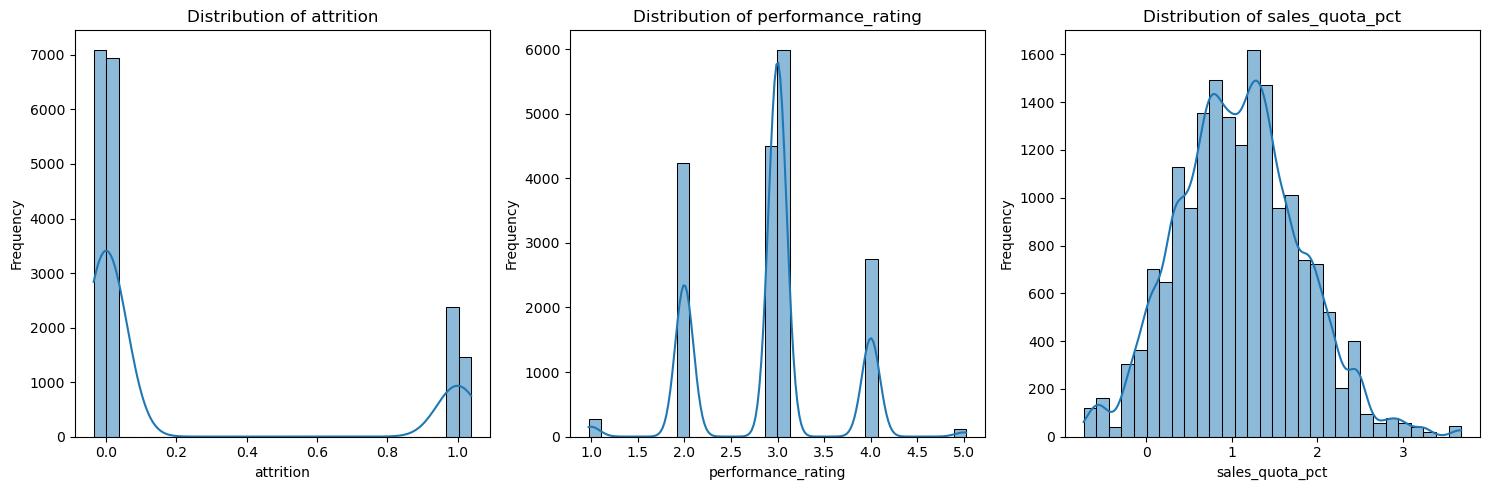

In [131]:
# Visualize the distribution of numerical features
numerical_features = ['attrition', 'performance_rating', 'sales_quota_pct']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Sales_quota_pct is normally distributed but attrition and performance_rating are not normally distributed.

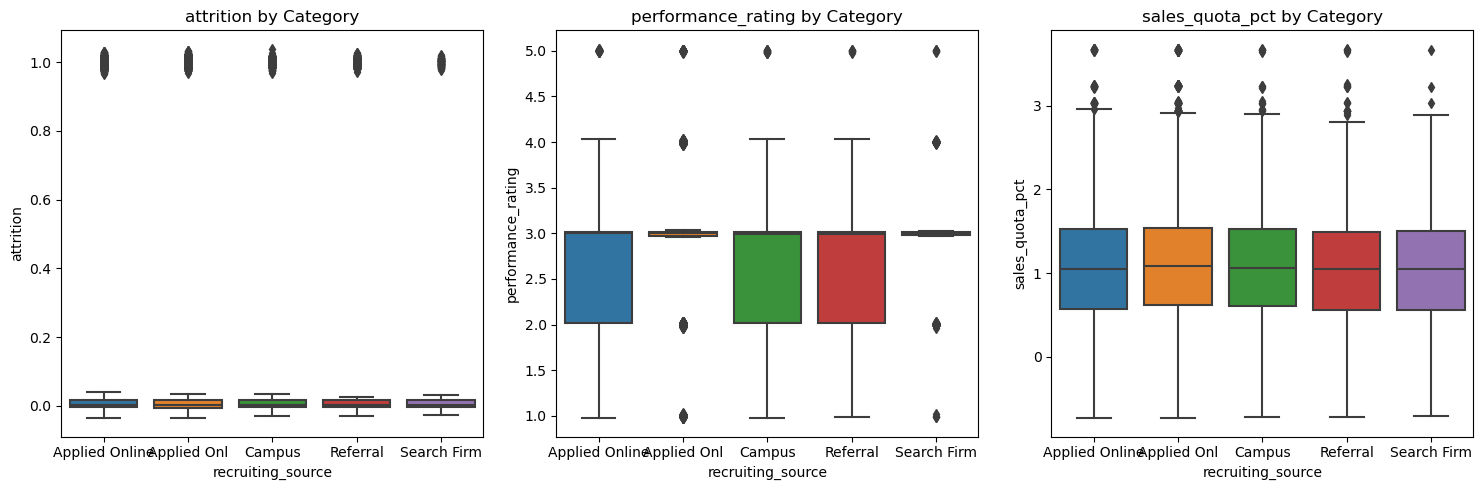

In [132]:
# Box plots to visualize spread and outliers

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x=df['recruiting_source'], y=df[feature])
    plt.title(f'{feature} by Category')
    plt.xlabel('recruiting_source')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

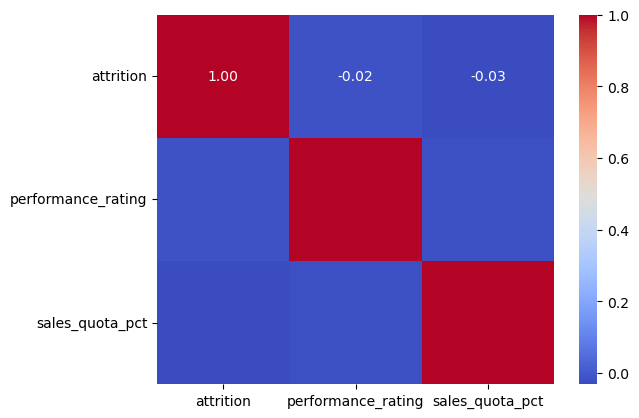

In [133]:
# Correlation Matrix

correlation_matrix = df[['attrition', 'performance_rating', 'sales_quota_pct']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

It shows the relation between the numerical features (either positive or negative)

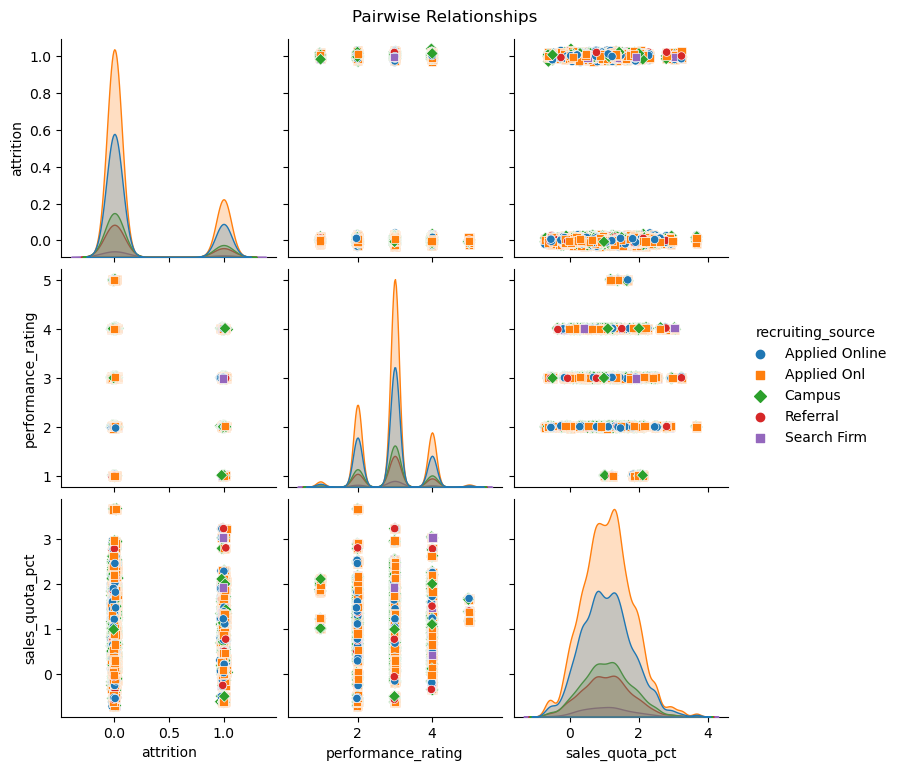

In [134]:
# Scatter plots for pairwise relationships

sns.pairplot(df[numerical_features + ['recruiting_source']], hue='recruiting_source', markers=["o", "s", "D"])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

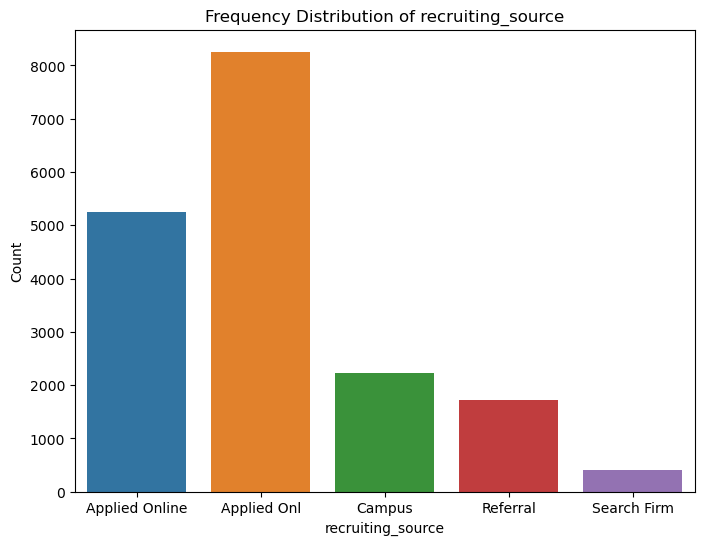

In [135]:
# Frequency distribution of categorical data

plt.figure(figsize=(8, 6))
sns.countplot(x='recruiting_source', data=df)
plt.title('Frequency Distribution of recruiting_source')
plt.xlabel('recruiting_source')
plt.ylabel('Count')
plt.show()

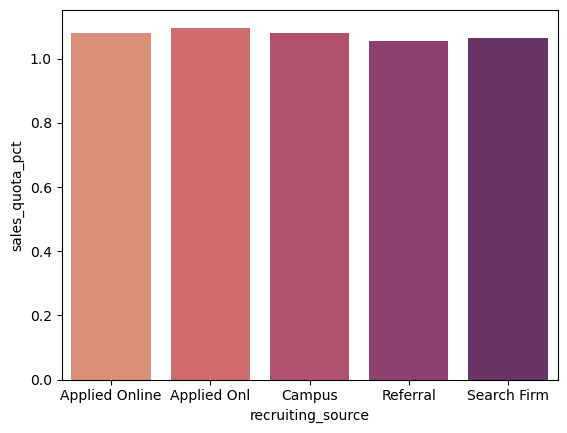

In [136]:
#Printing the graph of Sales Number grouped by Recruiting Source
sns.barplot(data=df, x='recruiting_source', y='sales_quota_pct',ci=None ,palette='flare')
plt.show()

In [137]:
#Printing the average Attrition Number grouped by Recruiting Source
avg_attrition_number = df.groupby("recruiting_source")["attrition"].mean()
avg_attrition_number

recruiting_source
Applied Onl       0.217262
Applied Online    0.211576
Campus            0.213631
Referral          0.214550
Search Firm       0.209370
Name: attrition, dtype: float64

After grouping by recruiting source we can see that minimum attrition is done by applied online category.


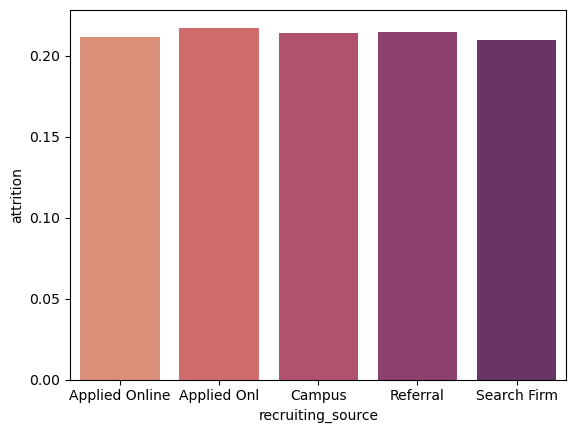

In [138]:
#Printing the graph of Attrition Number grouped by Recruiting Source
sns.barplot(data=df, x='recruiting_source', y='attrition',ci=None, palette='flare')
plt.show()

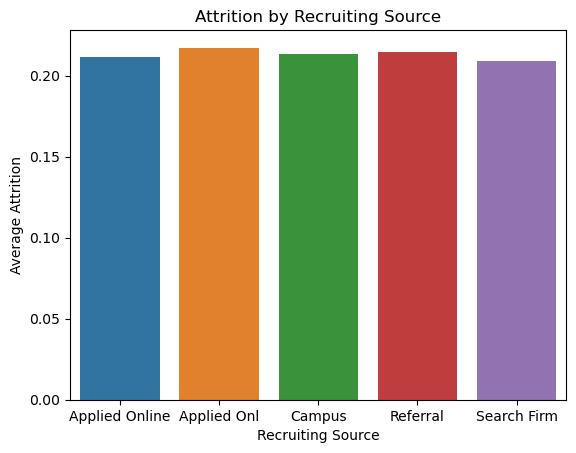

In [139]:
sns.barplot(x='recruiting_source', y='attrition', data=df, ci=None)
plt.xlabel('Recruiting Source')
plt.ylabel('Average Attrition')
plt.title('Attrition by Recruiting Source')
plt.show()

The following inferences can be made are :

In terms of sales performance, Applied Online is the top recruiting source, closely followed by Referral. The sales figures for Campus and Search Firm are much lower.

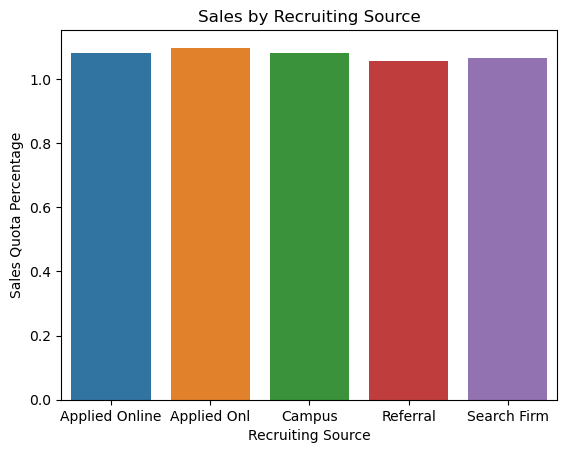

In [140]:
sns.barplot(data=df, x='recruiting_source', y='sales_quota_pct',ci=None)
plt.xlabel('Recruiting Source')
plt.ylabel('Sales Quota Percentage')
plt.title('Sales by Recruiting Source')
plt.show()

# Conclusion

In terms of sales performance, Applied Online, Campus and Search Firm is the top recruiting source, closely followed by Referral. The sales figures for Applied Onl are much lower.

Campus and Referral are the two best recruitment sources in terms of attrition rate. Applied Online and Search Firm are the sources with the highest attrition rates.

Only considering sales results or attrition rates should not be used to evaluate the quality of a recruiting source. When deciding on the best recruiting source, a balance between the two elements should be taken into account.

According to the visualizations and research presented above, Applied Online and Campus appears to be the most effective recruiting source because of its strong sales results and low attrition rate. However, more research is necessary to consider additional elements like recruitment expenses, the length of time it takes to fill positions, and the diversity of candidates.